In [1]:
import sys
sys.path.append('/Volumes/SANDISK128/Documents/Thesis/Python/')
sys.path.append('/Volumes/SANDISK128/Documents/Thesis/Python/Retrieval_MEPS/')
import netCDF4
import fill_values as fv
import datetime
import calc_date as cd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import save_fig as sF
import createFolder as cF
from matplotlib.gridspec import GridSpec
import plt_ce_image as im
import plot_sfc_spaghetti_ret as spagh

from scipy.integrate import simps
import matplotlib as mpl

In [2]:
year = '2016'
month = '12'
#t = ['21']
#t = ['17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27']
t = ['20', '21', '22', '23', '24', '25', '26', '27']
tid = '00'
station = 'Haukeliseter'


### Figures 
savefig = 0
figdir = '../../Figures/MEPS/LWC_LWP/_48'
cF.createFolder('%s/' %(figdir))
form = 'png'
################################################################
### MEPS
level = 'sfc'
nc_dir_sfc = '../../Data/MEPS/%s/%s_%s' %(station,level,tid)
level = 'ml'
nc_dir_ml = '../../Data/MEPS/%s/%s_%s' %(station,level,tid)
## air temperature
var_name_air_temp = 'air_temperature_ml'
air_temp_dir = '%s/%s' %(nc_dir_ml,var_name_air_temp)
# rain fall amount
var_name_snow = 'rainfall_amount_ml'
snow_dir = '%s/%s' %(nc_dir_ml,var_name_snow)

# atmosphere_cloud_condensed_water_content_ml
var_name_cl_ice = 'atmosphere_cloud_condensed_water_content_ml'
cl_ice_dir = '%s/%s' %(nc_dir_ml,var_name_cl_ice)

################################################################


In [3]:
air_temp_file     = dict()
snow_file         = dict()
cl_ice_file       = dict()

fn_air_temp       = dict()
fn_snow           = dict()
fn_cl_ice         = dict()

time_ml           = dict()
air_temp_ml       = dict()
pressure_ml       = dict()
snow_amount_ml    = dict()
cl_ice_ml         = dict()

thickness_ml      = dict()
ice_amount_ml     = dict()
time              = dict()
height_ml         = dict()
height            = dict()
density_ml        = dict()
SWP_model         = dict()
time_SWP          = dict()

In [4]:
Rd = 287.    # gas constant for dry air [J kg^-1 K^-1]

In [5]:
# layer for average snow water content within 200 m
nlay= 15
bot = []
top = []
for k in range(0, nlay):
    bot.append(100.+ k*200)
    top.append(bot[k]+200)

avg_SWC_ml = dict()
h_avg      = dict()
t_avg      = dict()

/Volumes/SANDISK128/Applications/anaconda/envs/py36ECMWF/lib/python3.6/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in greater_equal
/Volumes/SANDISK128/Applications/anaconda/envs/py36ECMWF/lib/python3.6/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in less
/Volumes/SANDISK128/Applications/anaconda/envs/py36ECMWF/lib/python3.6/site-packages/ipykernel_launcher.py:78: RuntimeWarning: Mean of empty slice
/Volumes/SANDISK128/Applications/anaconda/envs/py36ECMWF/lib/python3.6/site-packages/ipykernel_launcher.py:104: RuntimeWarning: invalid value encountered in greater


Tuesday, 20 Dec 2016
max SWC in ml       : 0.18 kg m^-3 in 200.0 m; @ 01 UTC
max SWC in ml EM mean: 0.19 kg m^-3 in 200.0 m; @ 01 UTC
max SWP in ml 0th EM: 69.88 kg m^-2; @ 11 UTC
max SWP in ml 1th EM: 47.78 kg m^-2; @ 11 UTC
max SWP in ml 2th EM: 16.72 kg m^-2; @ 06 UTC
max SWP in ml 3th EM: 38.24 kg m^-2; @ 09 UTC
max SWP in ml 4th EM: 66.75 kg m^-2; @ 12 UTC
max SWP in ml 5th EM: 127.23 kg m^-2; @ 12 UTC
max SWP in ml 6th EM: 16.27 kg m^-2; @ 06 UTC
max SWP in ml 7th EM: 18.40 kg m^-2; @ 12 UTC
max SWP in ml 8th EM: 51.78 kg m^-2; @ 12 UTC
max SWP in ml 9th EM: 53.62 kg m^-2; @ 12 UTC
max SWP in ml EM mean: 58.83 kg m^-2; @ 11 UTC


/Volumes/SANDISK128/Applications/anaconda/envs/py36ECMWF/lib/python3.6/site-packages/ipykernel_launcher.py:144: RuntimeWarning: Mean of empty slice
/Volumes/SANDISK128/Applications/anaconda/envs/py36ECMWF/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Volumes/SANDISK128/Applications/anaconda/envs/py36ECMWF/lib/python3.6/site-packages/ipykernel_launcher.py:143: RuntimeWarning: Mean of empty slice
/Volumes/SANDISK128/Applications/anaconda/envs/py36ECMWF/lib/python3.6/site-packages/ipykernel_launcher.py:198: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 67 but corresponding boolean dimension is 15
/Volumes/SANDISK128/Applications/anaconda/envs/py36ECMWF/lib/python3.6/site-packages/ipykernel_launcher.py:199: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 67 but corresponding boolean dimension is 15

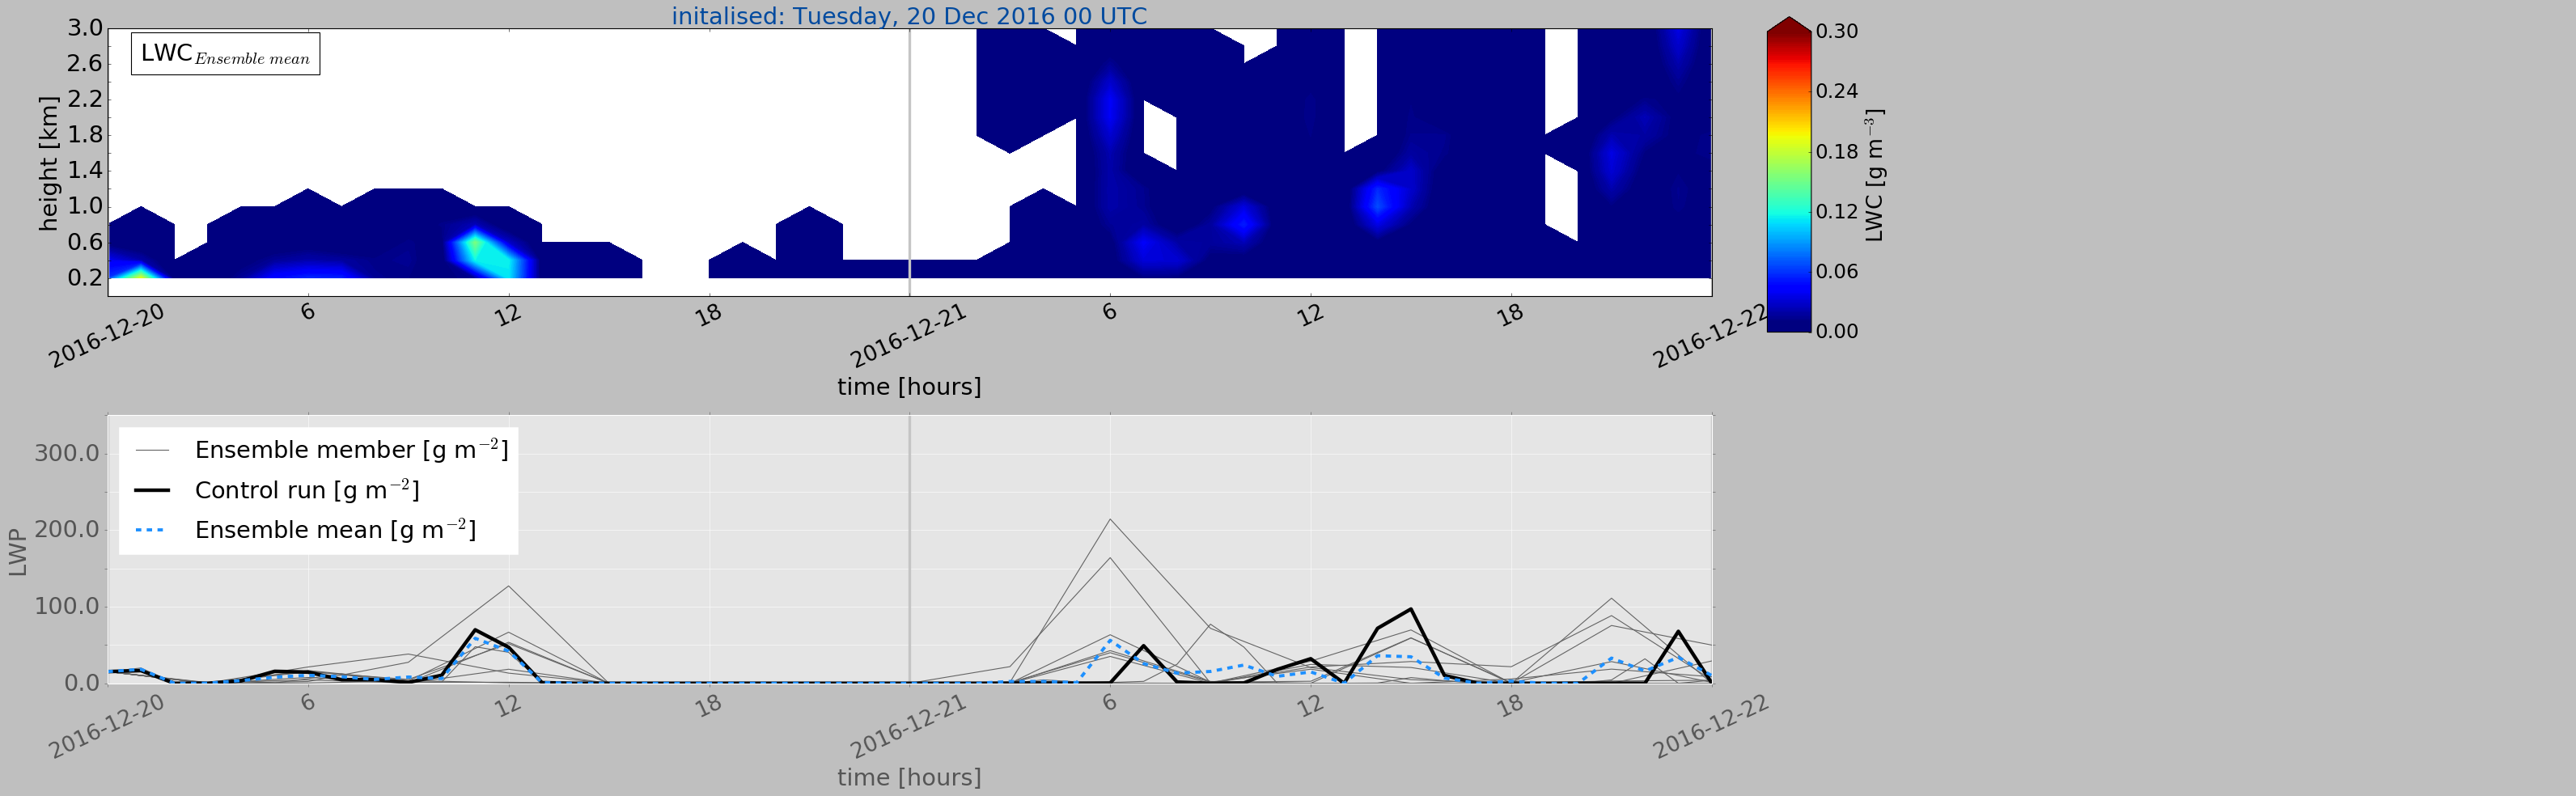

Wednesday, 21 Dec 2016
max SWC in ml       : 0.15 kg m^-3 in 2200.0 m; @ 23 UTC
max SWC in ml EM mean: 0.13 kg m^-3 in 1800.0 m; @ 23 UTC
max SWP in ml 0th EM: 140.39 kg m^-2; @ 23 UTC
max SWP in ml 1th EM: 123.98 kg m^-2; @ 16 UTC
max SWP in ml 2th EM: 4.41 kg m^-2; @ 15 UTC
max SWP in ml 3th EM: 38.32 kg m^-2; @ 06 UTC
max SWP in ml 4th EM: 35.39 kg m^-2; @ 12 UTC
max SWP in ml 5th EM: 138.11 kg m^-2; @ 18 UTC
max SWP in ml 6th EM: 81.21 kg m^-2; @ 21 UTC
max SWP in ml 7th EM: 90.66 kg m^-2; @ 21 UTC
max SWP in ml 8th EM: 281.28 kg m^-2; @ 06 UTC
max SWP in ml 9th EM: 17.43 kg m^-2; @ 06 UTC
max SWP in ml EM mean: 121.96 kg m^-2; @ 23 UTC


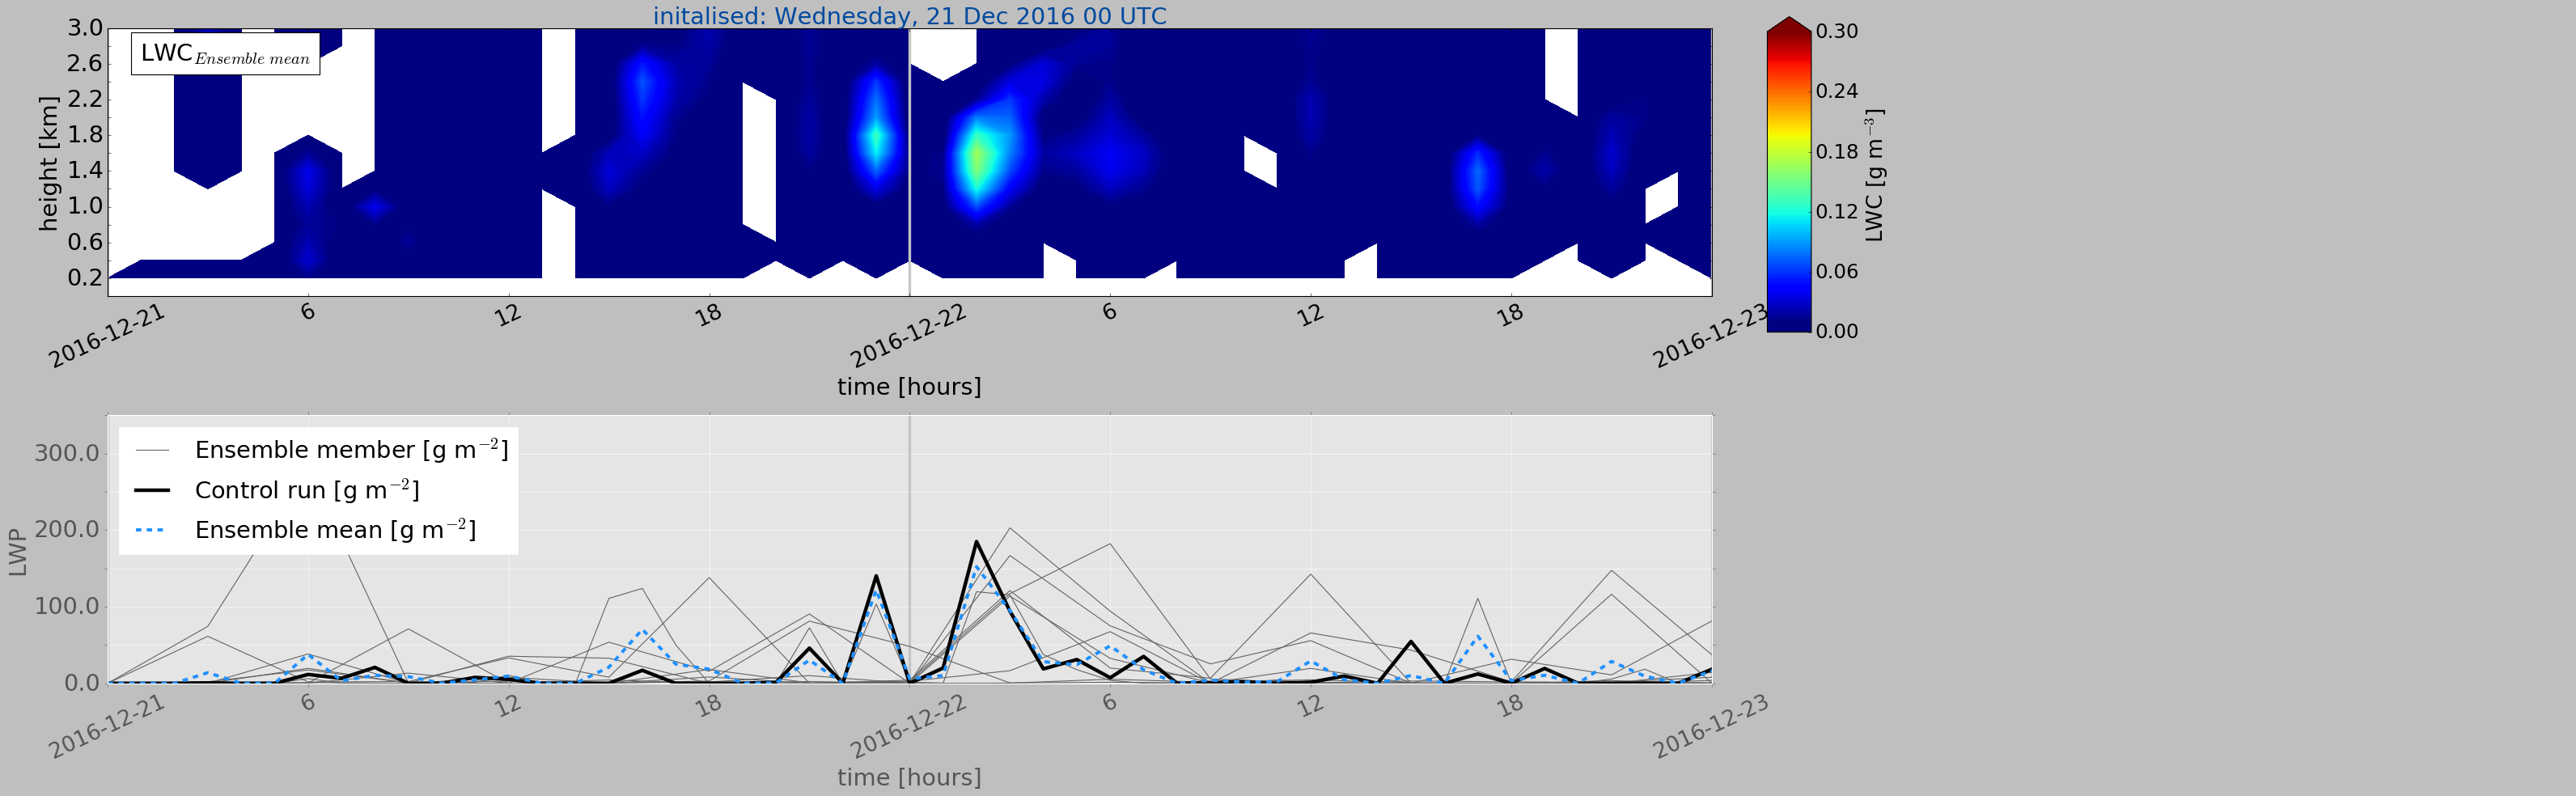

Thursday, 22 Dec 2016
max SWC in ml       : 0.20 kg m^-3 in 2000.0 m; @ 02 UTC
max SWC in ml EM mean: 0.10 kg m^-3 in 2000.0 m; @ 02 UTC
max SWP in ml 0th EM: 198.21 kg m^-2; @ 02 UTC
max SWP in ml 1th EM: 155.62 kg m^-2; @ 05 UTC
max SWP in ml 2th EM: 69.51 kg m^-2; @ 03 UTC
max SWP in ml 3th EM: 46.72 kg m^-2; @ 18 UTC
max SWP in ml 4th EM: 228.01 kg m^-2; @ 15 UTC
max SWP in ml 5th EM: 75.67 kg m^-2; @ 15 UTC
max SWP in ml 6th EM: 164.73 kg m^-2; @ 15 UTC
max SWP in ml 7th EM: 180.99 kg m^-2; @ 03 UTC
max SWP in ml 8th EM: 44.13 kg m^-2; @ 06 UTC
max SWP in ml 9th EM: 124.71 kg m^-2; @ 03 UTC
max SWP in ml EM mean: 99.11 kg m^-2; @ 02 UTC


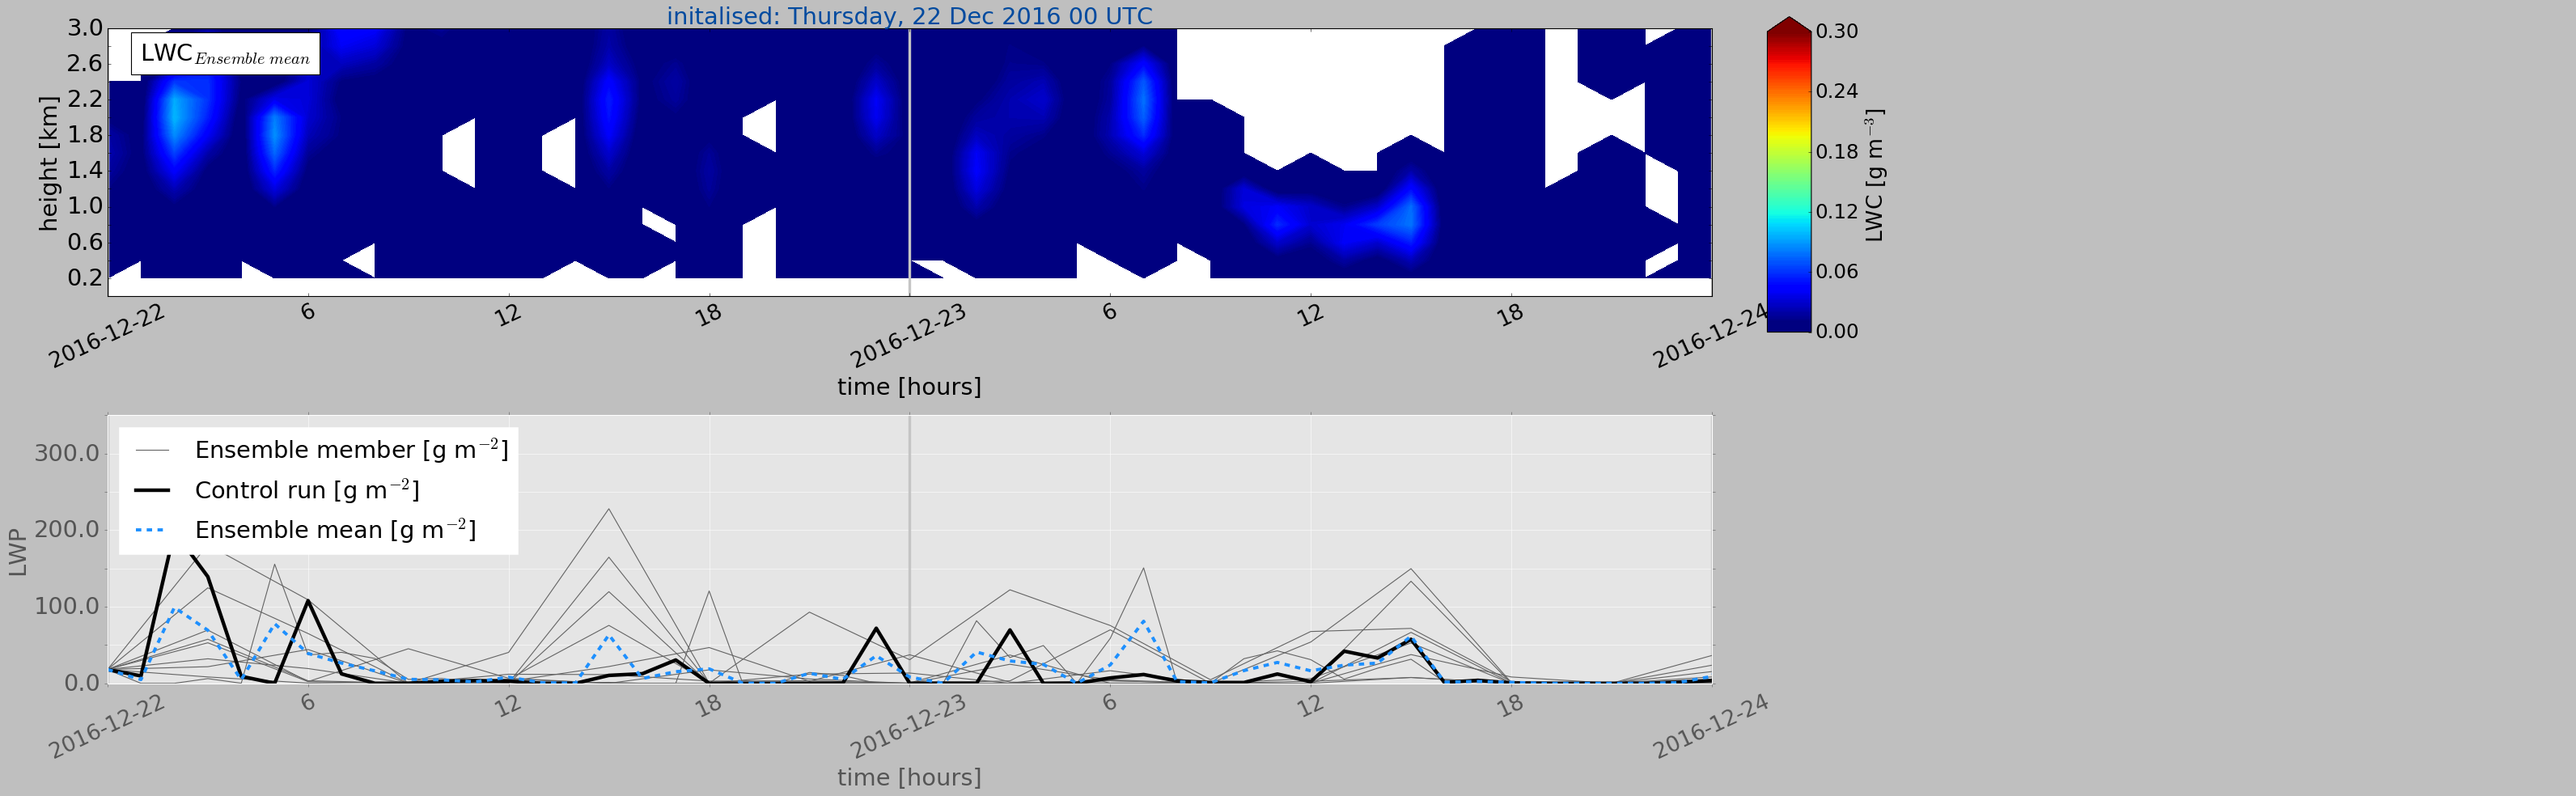

Friday, 23 Dec 2016
max SWC in ml       : 0.14 kg m^-3 in 1000.0 m; @ 15 UTC
max SWC in ml EM mean: 0.10 kg m^-3 in 1000.0 m; @ 15 UTC
max SWP in ml 0th EM: 124.53 kg m^-2; @ 03 UTC
max SWP in ml       : NaN
max SWP in ml       : NaN
max SWP in ml 3th EM: 112.39 kg m^-2; @ 15 UTC
max SWP in ml 4th EM: 78.18 kg m^-2; @ 03 UTC
max SWP in ml       : NaN
max SWP in ml       : NaN
max SWP in ml 7th EM: 187.24 kg m^-2; @ 06 UTC
max SWP in ml 8th EM: 14.35 kg m^-2; @ 00 UTC
max SWP in ml 9th EM: 148.10 kg m^-2; @ 03 UTC
max SWP in ml EM mean: 75.81 kg m^-2; @ 07 UTC


/Volumes/SANDISK128/Applications/anaconda/envs/py36ECMWF/lib/python3.6/site-packages/ipykernel_launcher.py:159: RuntimeWarning: All-NaN slice encountered


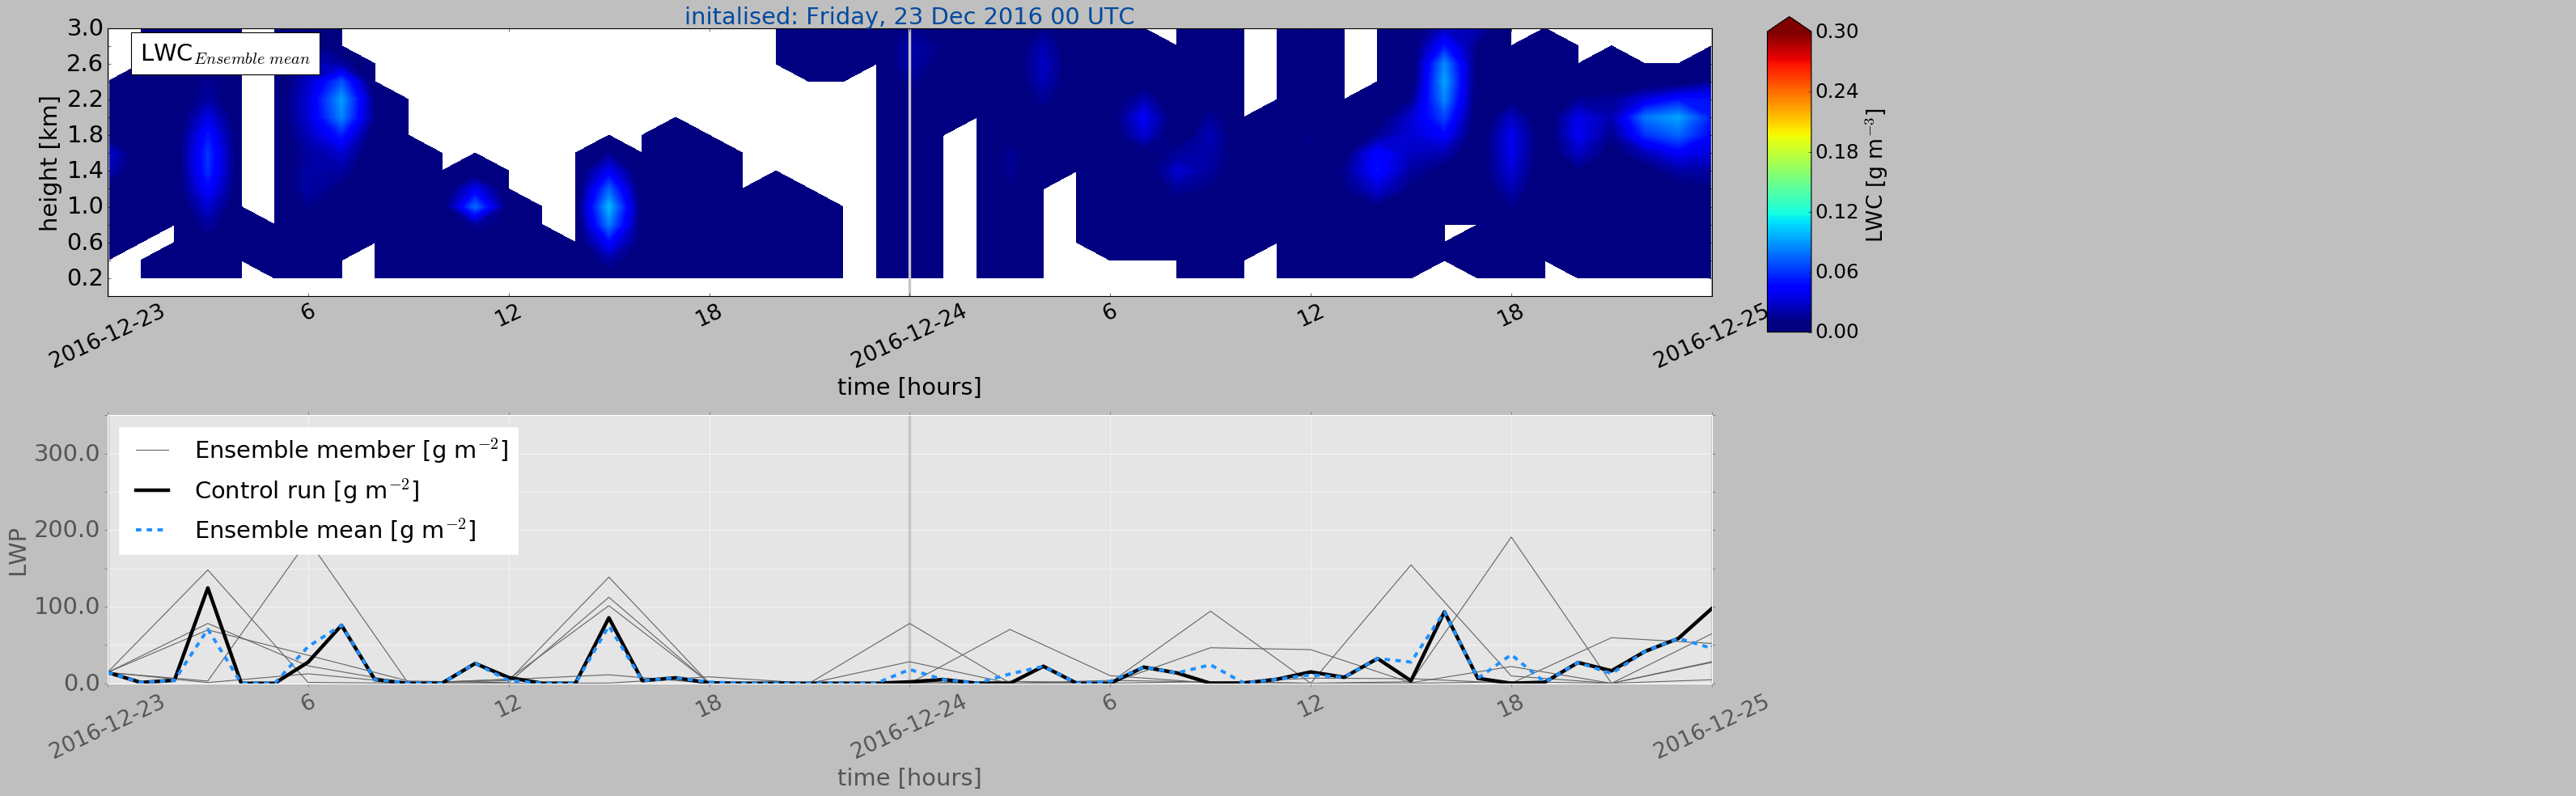

Saturday, 24 Dec 2016
max SWC in ml       : 0.33 kg m^-3 in 1200.0 m; @ 09 UTC
max SWC in ml EM mean: 0.09 kg m^-3 in 1800.0 m; @ 10 UTC
max SWP in ml 0th EM: 234.50 kg m^-2; @ 09 UTC
max SWP in ml 1th EM: 163.63 kg m^-2; @ 10 UTC
max SWP in ml 2th EM: 69.99 kg m^-2; @ 06 UTC
max SWP in ml 3th EM: 71.22 kg m^-2; @ 00 UTC
max SWP in ml 4th EM: 76.11 kg m^-2; @ 15 UTC
max SWP in ml 5th EM: 204.20 kg m^-2; @ 09 UTC
max SWP in ml 6th EM: 159.03 kg m^-2; @ 15 UTC
max SWP in ml 7th EM: 130.11 kg m^-2; @ 03 UTC
max SWP in ml 8th EM: 57.72 kg m^-2; @ 12 UTC
max SWP in ml 9th EM: 50.77 kg m^-2; @ 06 UTC
max SWP in ml EM mean: 85.34 kg m^-2; @ 10 UTC


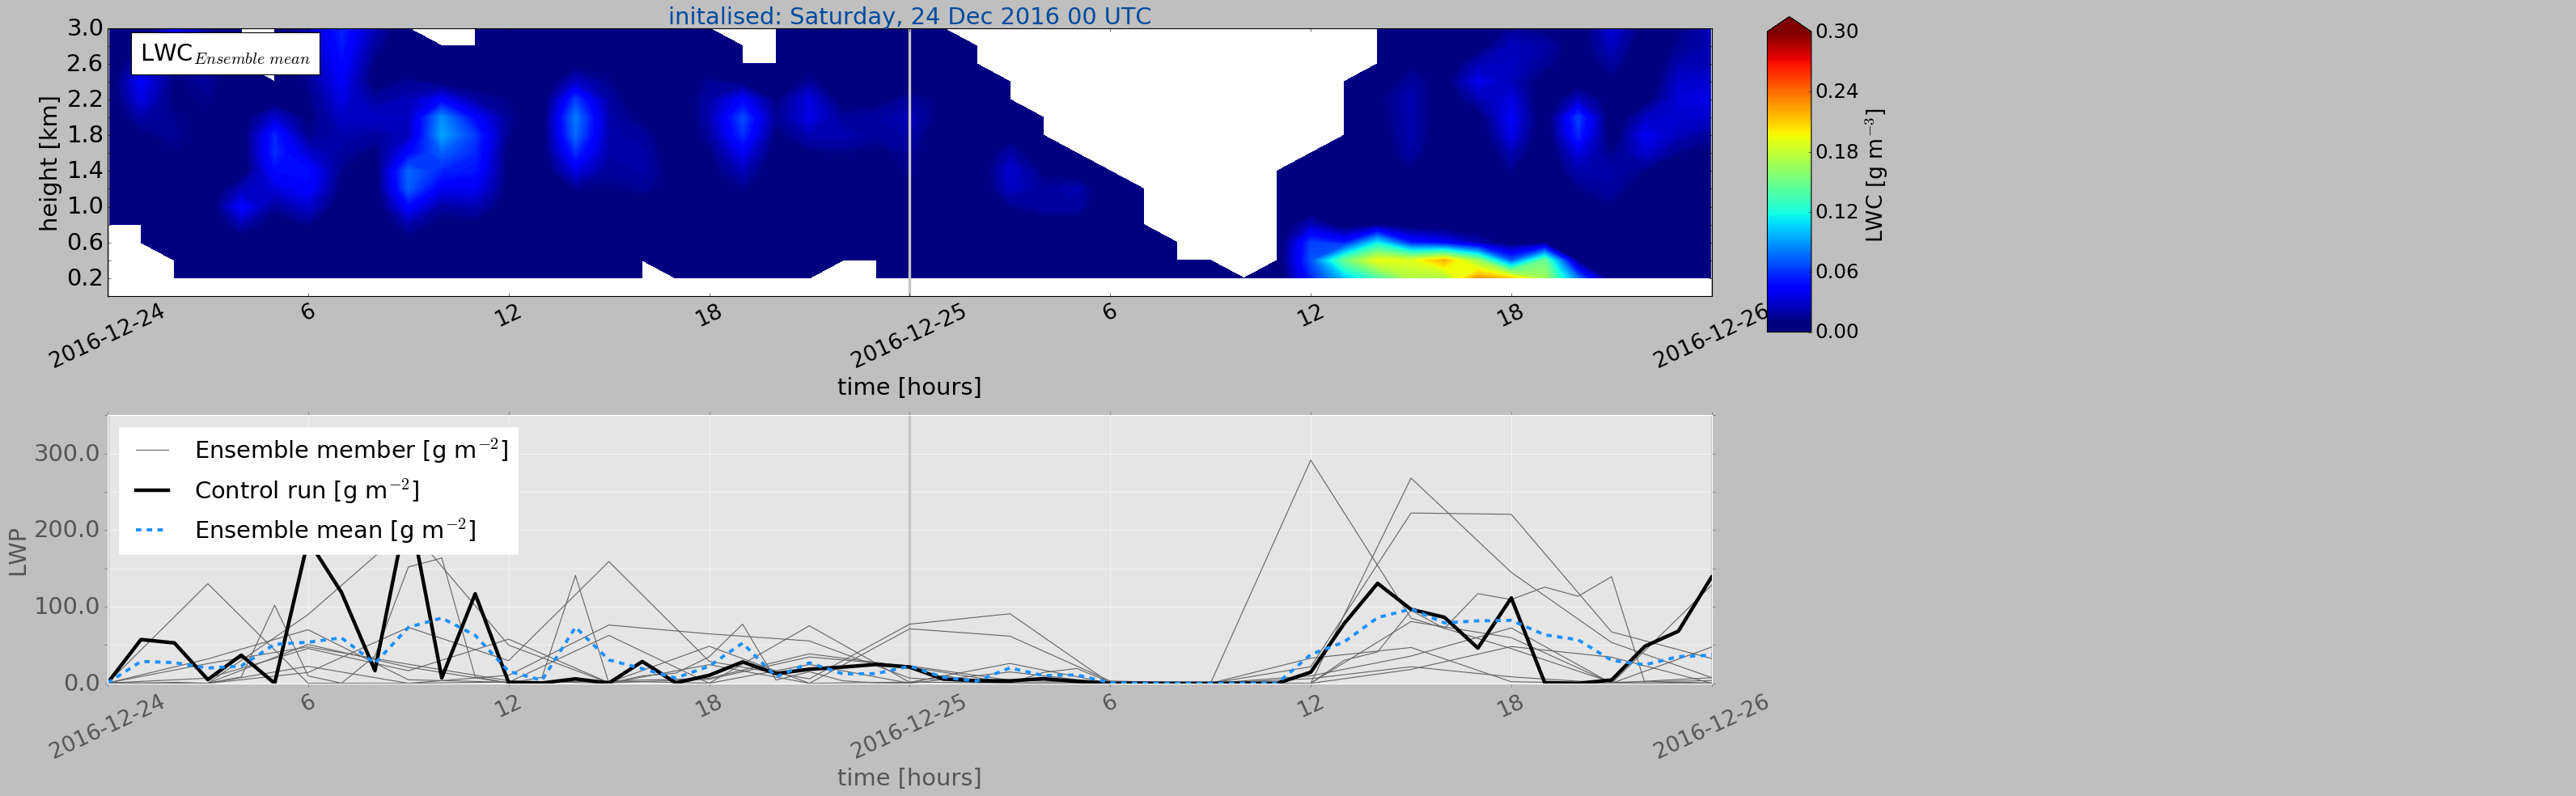

Sunday, 25 Dec 2016
max SWC in ml       : 0.34 kg m^-3 in 200.0 m; @ 17 UTC
max SWC in ml EM mean: 0.32 kg m^-3 in 200.0 m; @ 17 UTC
max SWP in ml 0th EM: 131.81 kg m^-2; @ 14 UTC
max SWP in ml 1th EM: 228.85 kg m^-2; @ 15 UTC
max SWP in ml 2th EM: 136.10 kg m^-2; @ 00 UTC
max SWP in ml 3th EM: 129.22 kg m^-2; @ 15 UTC
max SWP in ml 4th EM: 115.62 kg m^-2; @ 15 UTC
max SWP in ml 5th EM: 108.27 kg m^-2; @ 21 UTC
max SWP in ml 6th EM: 254.29 kg m^-2; @ 15 UTC
max SWP in ml 7th EM: 128.85 kg m^-2; @ 15 UTC
max SWP in ml 8th EM: 169.01 kg m^-2; @ 15 UTC
max SWP in ml 9th EM: 161.81 kg m^-2; @ 15 UTC
max SWP in ml EM mean: 150.53 kg m^-2; @ 15 UTC


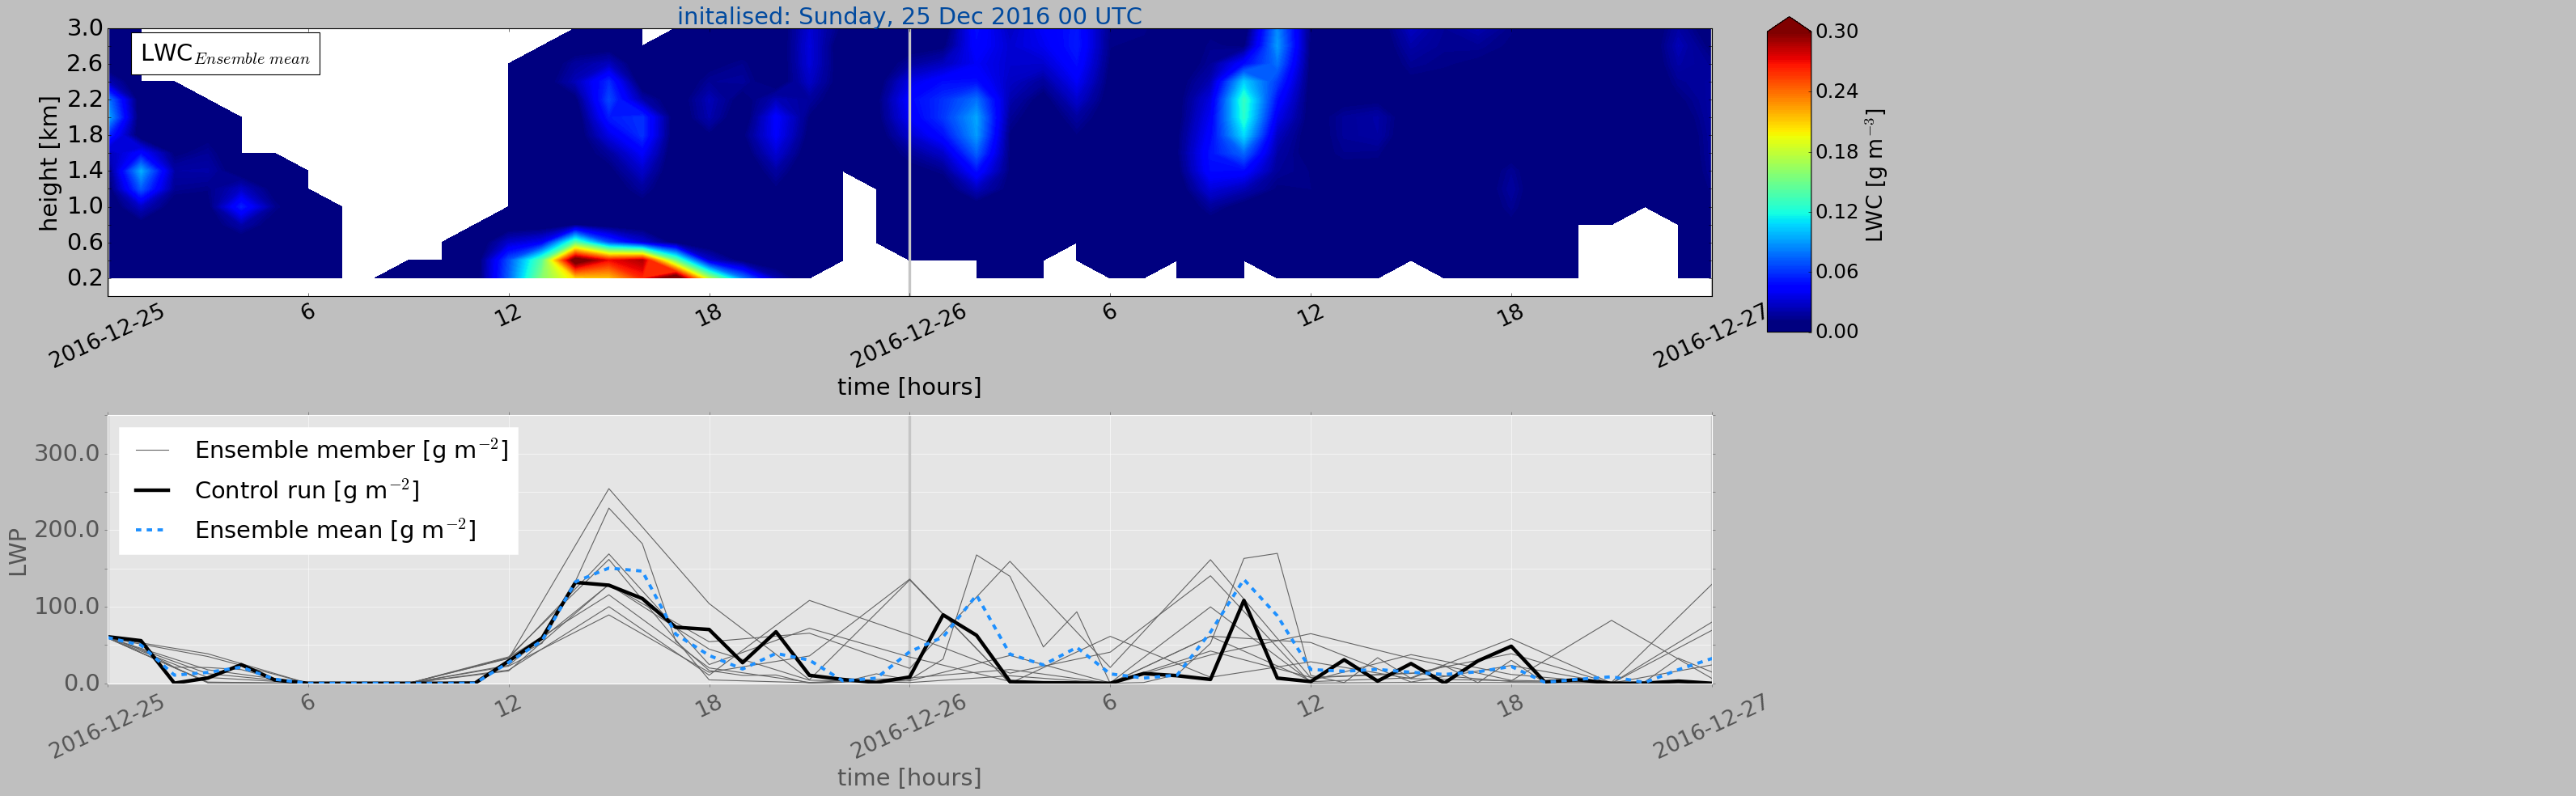

Monday, 26 Dec 2016
max SWC in ml       : 0.17 kg m^-3 in 2400.0 m; @ 09 UTC
max SWC in ml EM mean: 0.09 kg m^-3 in 1800.0 m; @ 09 UTC
max SWP in ml 0th EM: 199.21 kg m^-2; @ 02 UTC
max SWP in ml 1th EM: 133.74 kg m^-2; @ 03 UTC
max SWP in ml 2th EM: 116.55 kg m^-2; @ 12 UTC
max SWP in ml 3th EM: 238.18 kg m^-2; @ 03 UTC
max SWP in ml 4th EM: 162.98 kg m^-2; @ 03 UTC
max SWP in ml 5th EM: 63.05 kg m^-2; @ 09 UTC
max SWP in ml 6th EM: 162.66 kg m^-2; @ 06 UTC
max SWP in ml 7th EM: 142.85 kg m^-2; @ 09 UTC
max SWP in ml 8th EM: 108.93 kg m^-2; @ 09 UTC
max SWP in ml 9th EM: 190.21 kg m^-2; @ 09 UTC
max SWP in ml EM mean: 111.42 kg m^-2; @ 09 UTC


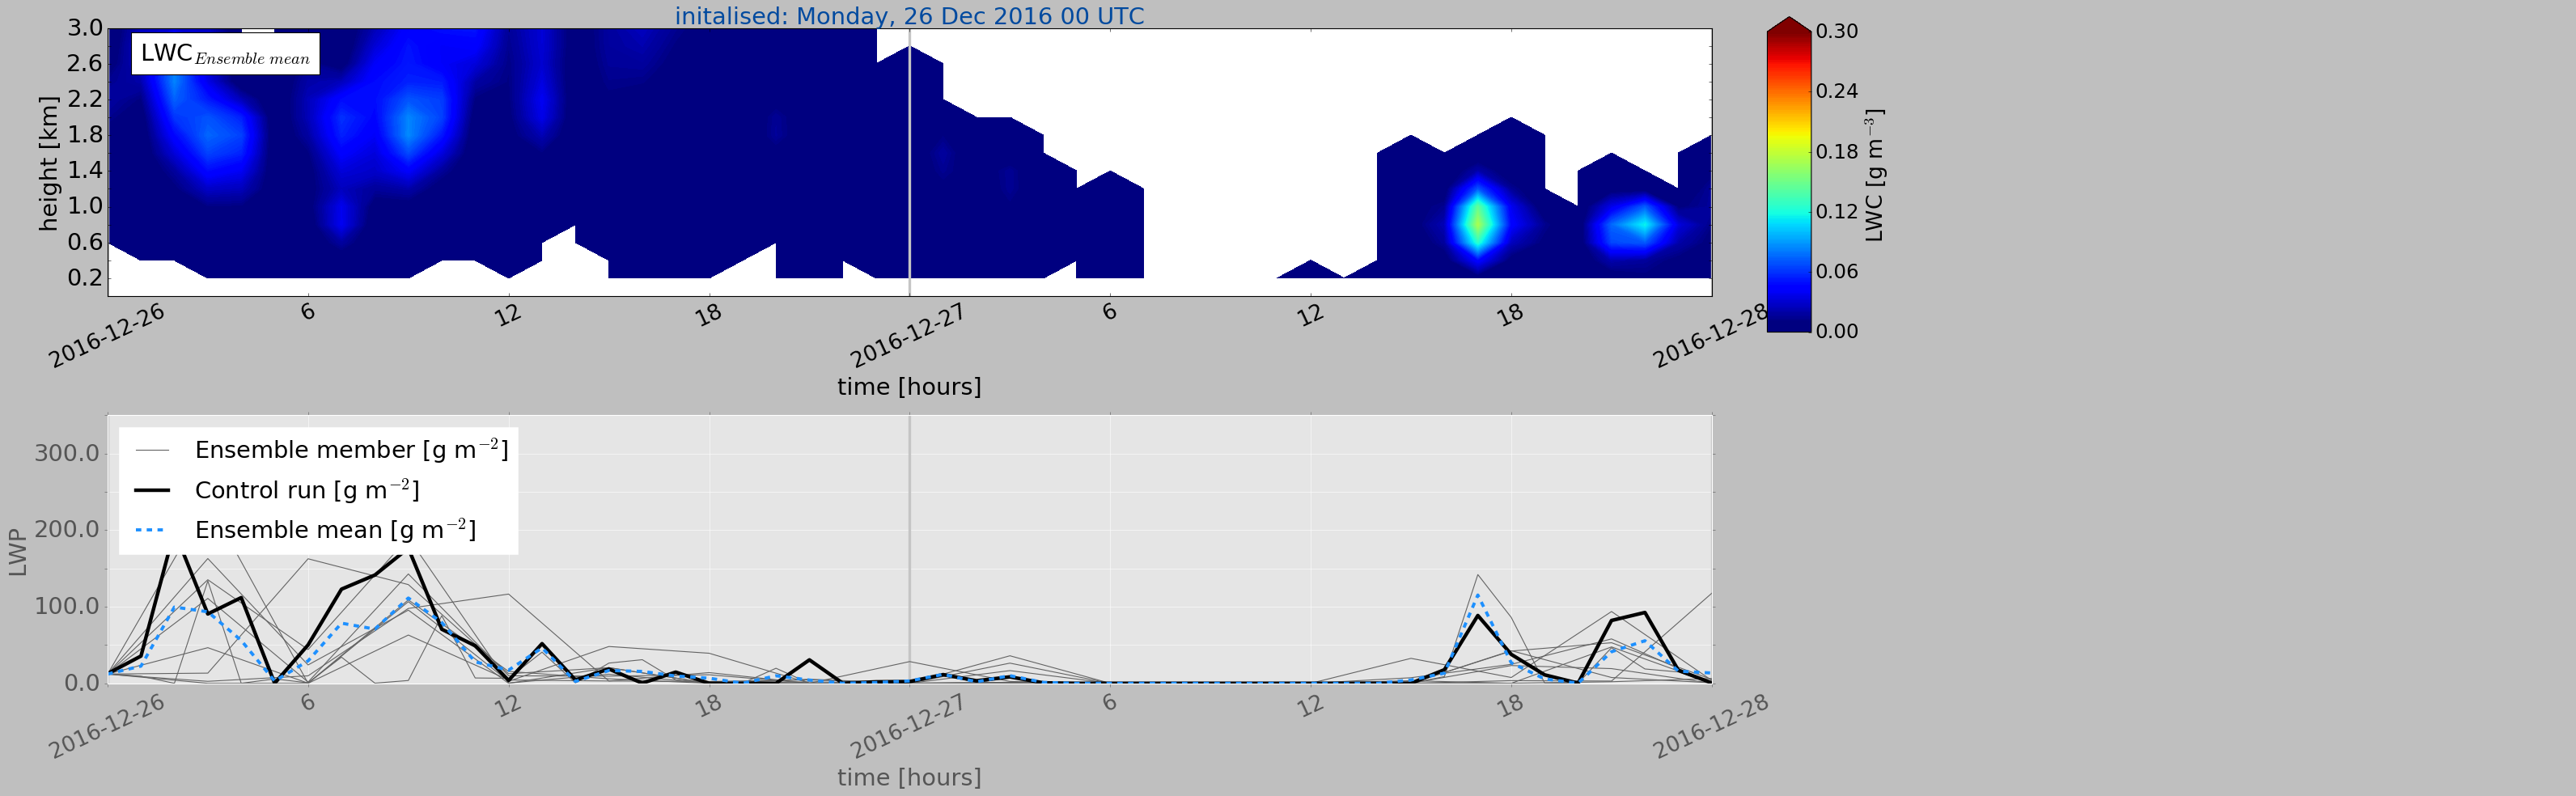

Tuesday, 27 Dec 2016
max SWC in ml       : 0.25 kg m^-3 in 800.0 m; @ 23 UTC
max SWC in ml EM mean: 0.13 kg m^-3 in 800.0 m; @ 23 UTC
max SWP in ml 0th EM: 143.85 kg m^-2; @ 23 UTC
max SWP in ml 1th EM: 125.53 kg m^-2; @ 00 UTC
max SWP in ml 2th EM: 61.21 kg m^-2; @ 00 UTC
max SWP in ml 3th EM: 108.53 kg m^-2; @ 21 UTC
max SWP in ml 4th EM: 21.12 kg m^-2; @ 21 UTC
max SWP in ml 5th EM: 37.21 kg m^-2; @ 18 UTC
max SWP in ml 6th EM: 16.23 kg m^-2; @ 21 UTC
max SWP in ml 7th EM: 8.90 kg m^-2; @ 21 UTC
max SWP in ml 8th EM: 37.88 kg m^-2; @ 00 UTC
max SWP in ml 9th EM: 63.51 kg m^-2; @ 00 UTC
max SWP in ml EM mean: 87.12 kg m^-2; @ 17 UTC


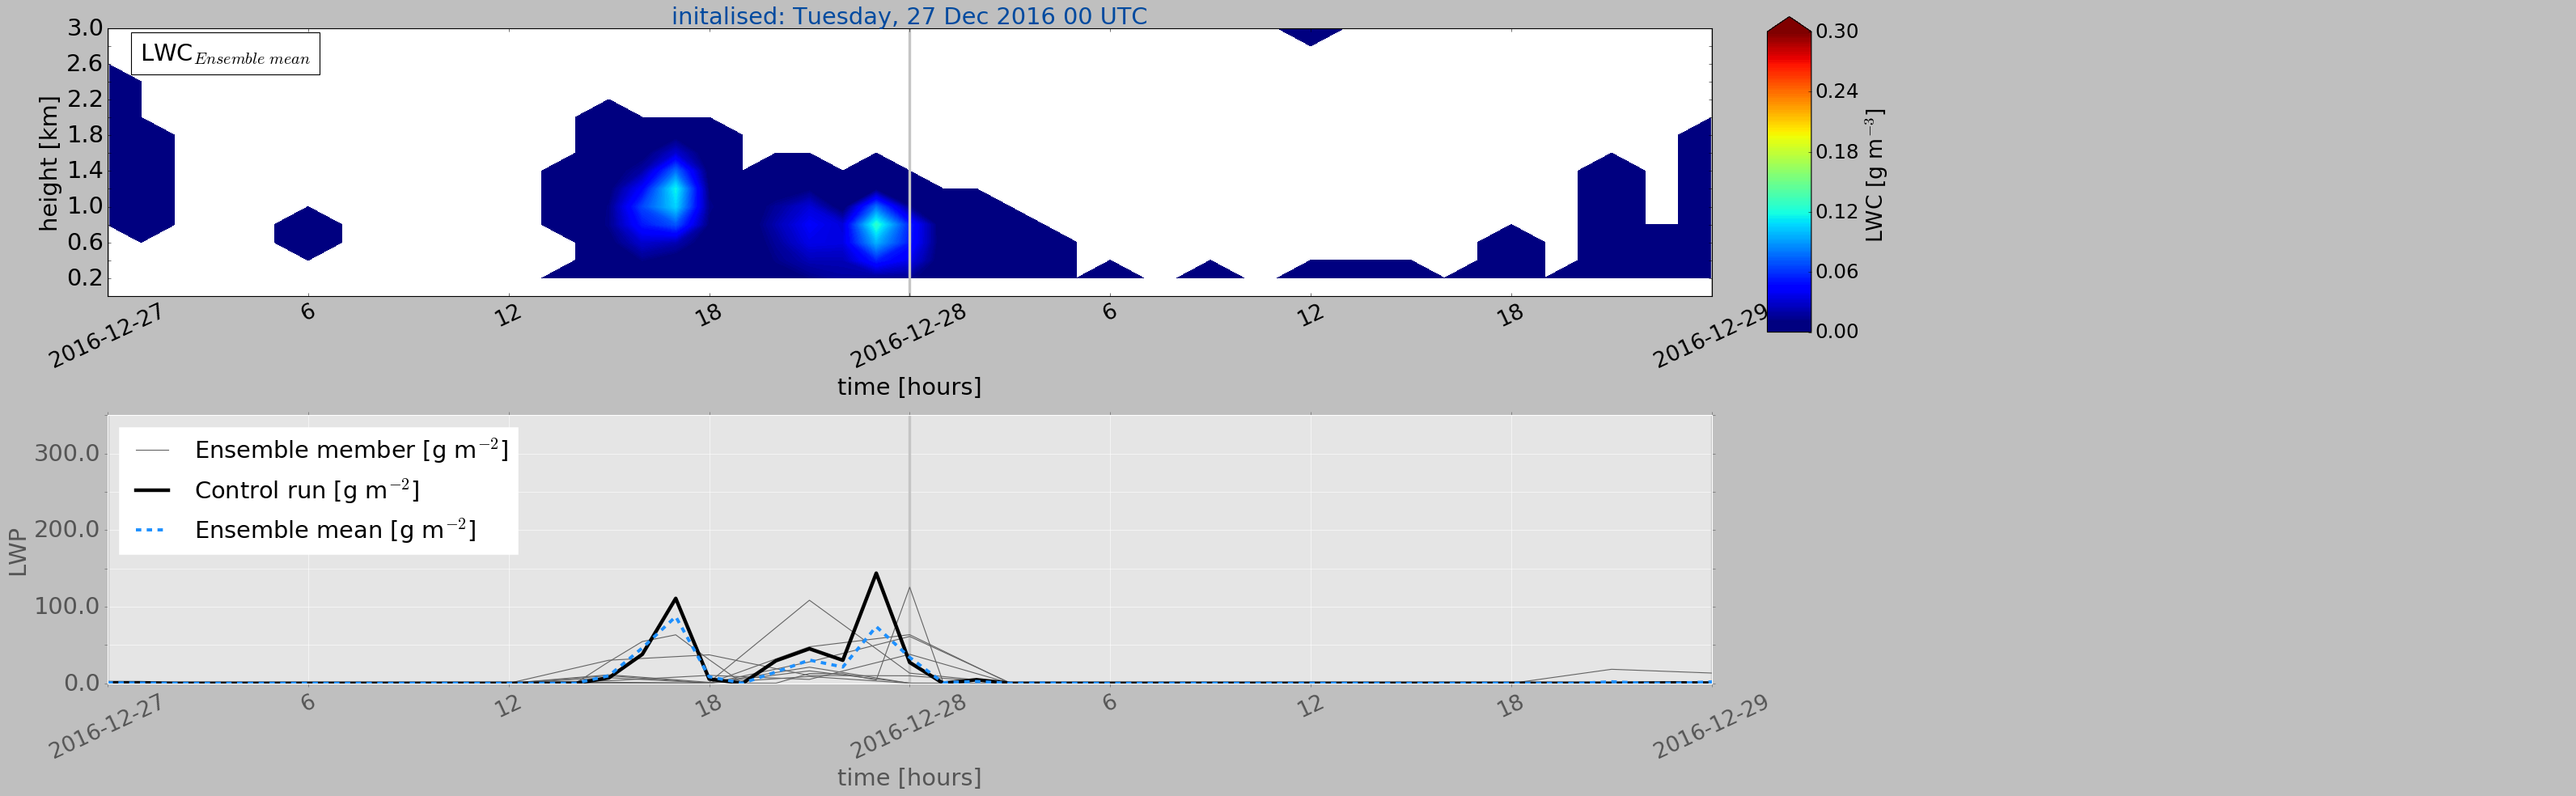

In [7]:
for k in range(0,np.asarray(t).shape[0]):
#for k in range(1,2):
    day = t[k]
#for day in t:
## MEPS ######
    for ens_memb in range(0,10):
        air_temp_file[ens_memb]= '%s/%s%s%s_%s_%s.nc' %(air_temp_dir,year,month,day,tid,ens_memb)
        snow_file[ens_memb]    = '%s/%s%s%s_%s_%s.nc' %(snow_dir,year,month,day,tid,ens_memb)
        cl_ice_file[ens_memb]  = '%s/%s%s%s_%s_%s.nc' %(cl_ice_dir,year,month,day,tid,ens_memb)
        
        fn_air_temp[ens_memb]  = netCDF4.Dataset(air_temp_file[ens_memb])
        fn_snow[ens_memb]      = netCDF4.Dataset(snow_file[ens_memb])
        fn_cl_ice[ens_memb]    = netCDF4.Dataset(cl_ice_file[ens_memb])

# Read in time to know initialisation time (plotting)    
        time_ml[ens_memb] = fn_snow[ens_memb].variables['time']
        time_ml[ens_memb] = fv.fill_nan(time_ml[ens_memb][:])
        

        ini_day = datetime.datetime.utcfromtimestamp(time_ml[0][0]).day   # day of initialisation
        hh = datetime.datetime.utcfromtimestamp(time_ml[0][0]).hour       # first hour of initialisation?
        calday, calmon = cd.get_dayname(year, month, ini_day)
        
# Read in the pressure, and the air temperature to calculate ice amount from [kg/kg] to [kg/m^3]
        air_temp_ml[ens_memb] = fn_air_temp[ens_memb].variables[var_name_air_temp]
        pressure_ml[ens_memb] = fn_snow[ens_memb].variables['pressure_ml']
# Read in the variable name which should be plotted  
        snow_amount_ml[ens_memb]    = fn_snow[ens_memb].variables[var_name_snow]
        cl_ice_ml[ens_memb]         = fn_cl_ice[ens_memb].variables[var_name_cl_ice]


# create an array with time of the shape of the variable
        lead_time   = np.arange(0,snow_amount_ml[ens_memb].shape[0])
        model_level = np.arange(0,snow_amount_ml[ens_memb].shape[1])
        td,Y        = np.meshgrid(lead_time,model_level)

# substitute missing values with nan 
        pressure_ml[ens_memb]       = fv.fill_nan(pressure_ml[ens_memb][:])
        air_temp_ml[ens_memb]       = fv.fill_nan(air_temp_ml[ens_memb][:])
        snow_amount_ml[ens_memb]    = fv.fill_nan(snow_amount_ml[ens_memb][:])
        cl_ice_ml[ens_memb]         = fv.fill_nan(cl_ice_ml[ens_memb][:])
# get ice amount (snow+graupel)
        ice_amount_ml[ens_memb]     = snow_amount_ml[ens_memb] + cl_ice_ml[ens_memb]
    
# layer thickness to calculate height
        thickness_ml[ens_memb]      = fn_snow[ens_memb].variables['layer_thickness']
        thickness_ml[ens_memb]      = fv.fill_nan(thickness_ml[ens_memb][:])
    
        thickness = thickness_ml[ens_memb]
        h_above = []
        h_above.append(np.zeros(thickness[:,:].shape[0]))
        th_arr = np.nansum([np.asarray(h_above)[:,0], thickness[:,0]], axis = 0)
        h_above.append(th_arr)
        for i in range(2,thickness[:,:].shape[1]):
            th_arr = np.nansum([h_above[i-1], thickness[:,i-1]], axis = 0)
            h_above.append(th_arr)
        height_ml[ens_memb] = np.transpose(h_above)
        
        


# calculate density at each level
        density_ml[ens_memb] = pressure_ml[ens_memb]/(Rd*air_temp_ml[ens_memb])
        

# convert from [kg/kg] to [kg/m^3]
        ice_amount_ml[ens_memb] = (ice_amount_ml[ens_memb]*density_ml[ens_memb])

# convert the snow amount from [kg/m^2] into [g/m^2] by multiply with 1000
        ice_amount_ml[ens_memb] = (ice_amount_ml[ens_memb]*1000.)
    
# calculate mean of snowfall amount in each layer, every 200m
        SWC_ml = []
        h_mid = []
        for k in range(0, nlay):
            tidx,hidx = np.where(np.logical_and(height_ml[ens_memb][:,:] >= bot[k], height_ml[ens_memb][:,:] < top[k]))
# average in layer
            SWC_ml.append(np.nanmean(ice_amount_ml[ens_memb][:,hidx[:]], axis = 1))
            h_mid.append((bot[k]+top[k])/2)
        avg_SWC_ml[ens_memb] = SWC_ml      
        
        time[ens_memb]          = td
        height[ens_memb]        = height_ml[ens_memb]   
        
        hidx = []
        tidx = []
        for i in range(0,np.asarray(avg_SWC_ml[ens_memb]).shape[1]):
            hidx.append(h_mid)
        h_avg[ens_memb] = hidx
        for i in range(0,np.asarray(avg_SWC_ml[ens_memb]).shape[0]):
            tidx.append(time[ens_memb][0,:])
        t_avg[ens_memb] = tidx

        
        SWP_ml = []
        SWP_ml_mean = []
        for i in range(0,np.transpose(avg_SWC_ml[ens_memb]).shape[0]):
            SWP_ml.append(simps(y = np.transpose(avg_SWC_ml[ens_memb])[i,:], 
                            x = np.asarray(h_avg[ens_memb])[i,:]))
        SWP_model[ens_memb] = SWP_ml
        
        
## only use values below 3km
        h1, h2 = np.where(height[ens_memb][:,:] > 3000)
        ice_amount_ml[ens_memb][h1[:],h2[:]] = np.nan
        time[ens_memb][h2[:],h1[:]]          = -9999
        height[ens_memb][h1[:],h2[:]]        = np.nan
        
        
    print('%s, %s %s %s' %(calday, day, calmon, year))

    ml1, ml2 = np.where(np.transpose(avg_SWC_ml[0]) == np.nanmax(np.transpose(avg_SWC_ml[0])[:24,:] ))
    if len(ml1) == 0 or len(ml2) == 0:
        print('max SWC in ml       : NaN')
    else:
        print('max SWC in ml       : %.2f kg m^-3 in %.1f m; @ %.02d UTC' %(np.nanmax(np.transpose(avg_SWC_ml[0])[:24,:]), np.asarray(h_avg[0])[ml1,ml2], datetime.datetime.utcfromtimestamp(time_ml[0][ml1]).hour))
    

###################################################################################
    val = np.zeros(shape=(10,np.asarray(avg_SWC_ml[0]).shape[0]))
    val2= np.zeros(shape=(10,np.asarray(SWP_model[0]).shape[0]))
#    ice_EM = []
    ice_mean = []
    SWP_mean_ml = []
 #   ice_median = []
  #  ice_75 = []
   # ice_25 = []
    #ice_max = []
#    ice_min = []
    ice_std = []
    variable = []
# calculate the ensemble mean of ice amount (all 10 ensemble member averaged)
    for k in range(0,ice_amount_ml[0].shape[0]):
#    for k in range(0,25):
#    for k in range(0,1):
        for ens_memb in range(0,10):
            val[ens_memb] = (np.transpose(avg_SWC_ml[ens_memb])[k,:])
            val2[ens_memb]= (np.transpose(SWP_model[ens_memb])[:])

        variable.append(val)
    ### std, mean
        ice_std.append(np.nanstd(val,axis=0,ddof=1))  
        ice_mean.append(np.nanmean(val,axis=0))
        SWP_mean_ml = (np.nanmean(val2,axis=0))
           
# MEPS
    ml12, ml22 = np.where((ice_mean) == np.nanmax(np.asarray(ice_mean)[:25,:] ))
    if len(ml12) == 0 or len(ml22) == 0:
        print('max SWC in ml EM mean: NaN')
    else:
        print('max SWC in ml EM mean: %.2f kg m^-3 in %.1f m; @ %.02d UTC' %(np.nanmax(np.asarray(ice_mean)[:25,:]), 
                                                                             np.asarray(h_avg[0])[ml12,ml22], 
                                                                             datetime.datetime.utcfromtimestamp(time_ml[0][ml12]).hour))

                                                              
        
    for ens_memb in range(0,10):        
    # SWP
        ml13 = np.where(np.transpose(SWP_model[ens_memb]) == np.nanmax(np.transpose(SWP_model[ens_memb])[:25] ))
        if np.size(ml13) == 0 :
            print('max SWP in ml       : NaN')
        else:
            print('max SWP in ml %sth EM: %.2f kg m^-2; @ %.02d UTC' %(ens_memb,
                                                                       np.nanmax(np.transpose(SWP_model[ens_memb])[:25]),  
                                                                       datetime.datetime.utcfromtimestamp(time_ml[ens_memb][ml13]).hour))
    
    ml14 = np.where((SWP_mean_ml) == np.nanmax(np.asarray(SWP_mean_ml)[:25] ))
    if len(ml14) == 0:
        print('max SWP in ml EM     : NaN')
    else:
        print('max SWP in ml EM mean: %.2f kg m^-2; @ %.02d UTC' %(np.nanmax(np.asarray(SWP_mean_ml)[:25]), 
                                                                datetime.datetime.utcfromtimestamp(time_ml[0][ml14]).hour))

    
### exclude small values of snowfall 
#    for ens_memb in range(0,10):
 #       if len(ice_amount_ml[ens_memb]) == 0:
  #          continue
   #     else:
    #        a2,b2 = np.where(ice_amount_ml[ens_memb][:,:] < 0.01)    ## 0.001? retrieved_snowfall_amount = iwcpsd*0.85*e-3*3600*24
     #       ice_amount_ml[ens_memb][a2[:],b2[:]] = np.nan
      #  if len(avg_SWC_ml[ens_memb]) == 0:
       #     continue
        #else:
         #   a3,b3 = np.where(np.asarray(avg_SWC_ml[ens_memb]) < 0.01)
          #  avg_SWC_ml[ens_memb] = np.asarray(avg_SWC_ml[ens_memb])
           # avg_SWC_ml[ens_memb][a3[:],b3[:]] = np.nan 
            
            #a4,b4 = np.where(np.asarray(ice_mean) < 0.01)
#            ice_mean = np.asarray(ice_mean)
 #           ice_mean[a4[:],b4[:]] = np.nan


        
    for ens_memb in range(0,10):
# get only valuable values not nan    
        time_ml[ens_memb]       = (time_ml[ens_memb][~np.isnan(time_ml[ens_memb])])
        time[ens_memb]          = (td[:,~np.isnan(avg_SWC_ml[ens_memb]).any(axis=1)])
        height[ens_memb]        = (height_ml[ens_memb][~np.isnan(avg_SWC_ml[ens_memb]).any(axis=1),:])
        thickness_ml[ens_memb]  = (thickness_ml[ens_memb][~np.isnan(avg_SWC_ml[ens_memb]).any(axis=1),:]) 
        air_temp_ml[ens_memb]   = (air_temp_ml[ens_memb][~np.isnan(avg_SWC_ml[ens_memb]).any(axis=1),:])
        pressure_ml[ens_memb]   = (pressure_ml[ens_memb][~np.isnan(avg_SWC_ml[ens_memb]).any(axis=1),:])
        
 #       avg_SWC_ml[ens_memb]    = (avg_SWC_ml[ens_memb][:,~np.isnan(avg_SWC_ml[ens_memb]).any(axis=0)])

       
        
        time_SWP[ens_memb]      = (td[:,~np.isnan(SWP_model[ens_memb])])
        SWP_model[ens_memb]     = np.asarray(SWP_model[ens_memb])[~np.isnan(np.asarray(SWP_model[ens_memb]))]

        
###################################################################################
### merge the values of two retrieval days 
#    if Ze[day].shape[0] > 1440:
   #     print('Ze ==', Ze[day].shape[0])
 #       df1 = Ze[day][:-1]
  #      df2 = Ze[str(int(day)+1)][1::,:]
   # elif Ze[str(int(day)+1)].shape[0] > 1440:
  #      print('Ze(day+1) == ', Ze[str(int(day)+1)].shape[0])
    #    df1 = Ze[day]
     #   df2 = Ze[str(int(day)+1)][1:-1,:]
#    else:
 #       df1 = Ze[day]
  #      df2 = Ze[str(int(day)+1)][1::,:]
   # mergedZe = []
    #mergedZe.extend(df1)
#    mergedZe.extend(df2)

#    np.asarray(mergedZe).shape

 #   mergedSWC = []
  #  mergedSWC.extend(np.transpose(SWC[day]))
   # mergedSWC.extend(np.transpose(SWC[str(int(day)+1)][:,1::][:]))
    
    #np.asarray(mergedSWC).shape
    
#    merged_mean_SWC = []
 #   merged_mean_SWC.extend(np.transpose(mean_SWC[day]))
  #  merged_mean_SWC.extend(np.transpose(mean_SWC[str(int(day)+1)][:,1::][:]))
   # np.asarray(merged_mean_SWC).max()
    #np.asarray(merged_mean_SWC).shape
    

#    mergedSWP = []
 #   mergedSWP.extend(SWP_ret[day])
  #  mergedSWP.extend(SWP_ret[str(int(day)+1)][1::][:])
    
   # merged_mean_SWP = []
    #merged_mean_SWP.extend(SWP_mean_ret[day])
#    merged_mean_SWP.extend(SWP_mean_ret[str(int(day)+1)][1::][:])

#    np.asarray(mergedSWP).max()
 #   np.asarray(mergedSWP).shape
    
  #  np.asarray(merged_mean_SWP).max()
   # np.asarray(merged_mean_SWP).shape
    
    
### calculate the fraction between ensemble mean and retrival
#    if day == '20':
 #       SWC_frac = np.asarray(ice_mean)[:48,1:]/np.asarray(merged_mean_SWC)
  #  else:
   #     SWC_frac = np.asarray(ice_mean)[:49,1:]/np.asarray(merged_mean_SWC)


        
########################################
### PLOTTING ###########
    xdays = ['%s-%s-%s' %(year,month,ini_day), 
        6,12, 18,
        '%s-%s-%s' %(year,month,ini_day+1), 
        6, 12, 18,
        '%s-%s-%s' %(year,month,ini_day+2)]

    fig_name = '%s%s%s.%s' %(year,month,ini_day,form)
    fig = plt.figure(figsize=(18.,12.5))

    gs = GridSpec(2,2)

################
########################################
### PLOTTING ###########
    mpl.style.use('classic')
    fig_name = '%s%s%s.%s' %(year,month,ini_day,form)
    fig = plt.figure(figsize=(40.,12.5))

    gs = GridSpec(2,3)
################
## 4th subplot --- SNOW WATER CONTENT ML
    ax3 = plt.subplot(gs[0,:-1])
    # Vertical line to show end of day
    ax3.axvline(0,color = spagh.vert_col, linewidth = 3)
    ax3.axvline(24,color = spagh.vert_col, linewidth = 3)
    ax3.axvline(48,color = spagh.vert_col, linewidth = 3)
    
    levels = np.arange(0,1.51/5,0.01/5)
#    im3 = im.plt_ce_image2(ax3, t_avg[0], np.transpose(h_avg[0]), avg_SWC_ml[0],levels,
 #           v_min=0., v_max=1.5/5, xmax=24., ymax=3000.,
  #          xticks=im.xticks2, yticks=im.yticks1,
   #         xlabel=im.times)
    im3 = im.plt_ce_image2(ax3, np.transpose(t_avg[0]), (h_avg[0]), ice_mean,levels,
            v_min=0.01, v_max=1.5/5, xmax=48., ymax=3000.,
            xticks=np.arange(0,49,6), yticks=im.yticks1,
            xlabel=xdays)
#    ax3.text(0.02,0.95, '%s, %s %s %s' %(calday, day, calmon, year),
 #           verticalalignment ='top', horizontalalignment='left',
  #           transform = ax3.transAxes,
   #          color = im.date_blue, fontsize = im.fontsize,
    #         bbox={'facecolor':'white','alpha':1.,'pad':10})
    ax3.text(0.02,0.95, 'LWC$_{Ensemble\,\,mean}$' ,
            verticalalignment ='top', horizontalalignment='left',
             transform = ax3.transAxes,
             color = 'k', fontsize = im.fontsize,
             bbox={'facecolor':'white','alpha':1.,'pad':10})
    
    # title
    if hh < 10:
        hh = '0%s' %(hh)
    else:
        hh = '%s' %(hh)
        
    title = 'initalised: %s, %s %s %s %s UTC' %(calday,day,calmon,year,hh)
    ax3.set_title(title, fontsize=im.fontsize, color =im.date_blue )
#    ax3.text(0.02,0.95, 'LWC$_{Control\,\,run}$' ,
 #           verticalalignment ='top', horizontalalignment='left',
  #           transform = ax3.transAxes,
   #          color = 'k', fontsize = im.fontsize,
    #         bbox={'facecolor':'white','alpha':1.,'pad':10})

    ax31 = plt.subplot(gs[0,-1])
    cbaxes = fig.add_axes([0.685, .581, 0.017, 0.39])  # [left, bottom, width, height] 
    im.add_colorbar2(fig,ax31, im3, cbaxes, levels[::30], 'LWC [g m$^{-3}$]')

################
## 6th subplot
    mpl.style.use('ggplot')
    ax5 = plt.subplot(gs[1,:-1])
    # Vertical line to show end of day
    ax5.axvline(0,color = spagh.vert_col, linewidth = 3)
    ax5.axvline(24,color = spagh.vert_col, linewidth = 3)
    ax5.axvline(48,color = spagh.vert_col, linewidth = 3)
# ensemble members
    for ens_memb in range(2,10):
#        ax5.plot(np.asarray(t_avg[ens_memb])[0,:], SWP_model[ens_memb], color = im.memb_col, linestyle='-', label='_nolegend_')
        ax5.plot(np.asarray(time_SWP[ens_memb])[0,:],SWP_model[ens_memb], color = im.memb_col, linestyle='-', label='_nolegend_')
    ax5.plot(np.asarray(time_SWP[1])[0,:], SWP_model[1], color = im.memb_col, linestyle='-', label='Ensemble member [g m$^{-2}$]')
    ax5.plot(np.asarray(time_SWP[0])[0,:], SWP_model[0], 'k', linewidth=4, label='Control run [g m$^{-2}$]')
    ax5.plot(np.asarray(t_avg[0])[0,:], SWP_mean_ml, color='dodgerblue', linewidth = 3.5, 
             linestyle = '--', label = 'Ensemble mean [g m$^{-2}$]') 
    
    
    ax5.axis([0, 2*24, 0, 300.])
### fine tuning
    lgd = ax5.legend(loc='upper left',fontsize=im.fontsize)
    frame = lgd.get_frame()
    frame.set_facecolor('white')
    
#    plt.grid()
# labels
    im.labels_x(ax5,np.arange(0,49,6),xdays)
    im.labels_y(ax5,np.arange(0,400,50), [0., '', 100., '', 200., '', 300.,'',400.], 'LWP')


################
    plt.tight_layout(pad=1.4, w_pad=1.5, h_pad=1.5)

    if savefig ==1:
        sF.save_figure_portrait(figdir, fig_name, form)
        print('saved: %s/%s' %(figdir, fig_name))
    else:
        plt.show()
    plt.close()
    
    for ens_memb in range(0,10):
        fn_air_temp[ens_memb]  
        fn_snow[ens_memb]      
        fn_cl_ice[ens_memb]


